In [1]:
using LinearAlgebra
using SparseArrays
using Plots
using MatrixMarket

In [2]:
file_name = "Trefethen_150/Trefethen_150.mtx"
# The entries are zero everywhere except for the prime numbers
# 2, 3, 5, 7, ..., 863 along the main diagonal.
# Then, we add the number 1 in all the positions A[i,j] with
# |i-j| = 1, 2, 4, 8, ..., 128.

# Load the matrix using the matrix market format (this is an optional step).
# Information data for the matrix
rows, cols, entries, mat_format, field, symm = MatrixMarket.mmread(file_name,true)

println("Number of rows    = ", rows)
println("Number of columns = ", cols)
println("Number of entries = ", entries)

# Read the matrix data
Amm = MatrixMarket.mmread(file_name)
@show typeof(Amm)
@show fieldnames(typeof(Amm))

Number of rows    = 150
Number of columns = 150
Number of entries = 1095
typeof(Amm) = SparseMatrixCSC{Int64,Int64}
fieldnames(typeof(Amm)) = (:m, :n, :colptr, :rowval, :nzval)


(:m, :n, :colptr, :rowval, :nzval)

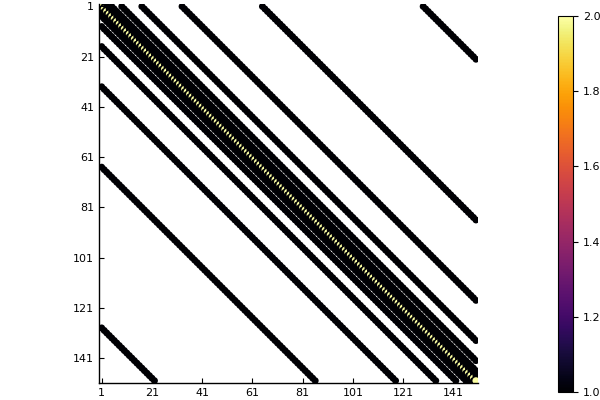

In [3]:
# Plot the matrix
pyplot()
n = Amm.m # Size of matrix
plot(spy(Amm), xaxis=((0,n+1), 1:20:n), yaxis=((0,n+1), 1:20:n), 
    markersize = 5, clims = (1,2))

In [4]:
include("Sparse.jl")
;

In [5]:
# Currently, the matrix uses the CSC format (column format).
# This is often the default, but for this class CSR will be much easier.
A = SparseMatrixCSR(Amm)

# println("Matrix A"); println(A)
println("Indices of the non-zero entries in the 1st row ", A.colval[A.rowptr[1]:A.rowptr[2]-1])
println("Non-zero entries in the first row              ", A.nzval[A.rowptr[1]:A.rowptr[2]-1])

# Matrix-vector product using the CSR format
x = rand(-9:9,A.n)
y = Vector{Float64}(undef,A.m)

# At the end: y = A * x
for i=1:A.m
    y[i] = 0.0
    for k=A.rowptr[i]:A.rowptr[i+1]-1
        y[i] += A.nzval[k] * x[A.colval[k]]
    end
end    

println("Error should be equal to 0: ", norm(y - Amm * x))
norm(y - Amm * x) == 0 ? "PASS" : "FAIL"

Indices of the non-zero entries in the 1st row [1, 2, 3, 5, 9, 17, 33, 65, 129]
Non-zero entries in the first row              [2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Error should be equal to 0: 0.0


"PASS"